In [1]:
%matplotlib inline
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.dataviz import setup_color
from lssutils.utils import make_hp
from lssutils.stats.cl import AnaFast
import fitsio as ft
import healpy as hp

In [32]:
setup_color()

In [3]:
nran = np.load('/home/mehdi/data/tanveer/dr8/elg_ran1024.npy')
windows = glob('/home/mehdi/data/tanveer/dr8/elg_mse_snapshots/windows/*')

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [6]:
wnn = np.zeros(12*1024**2)
for wind in windows:
    w_ = ft.read(wind)
    w_m = make_hp(1024, w_['hpix'], w_['weight'])
    wnn += w_m
    print('.', end='')
    
wnn /= len(windows)

..................................................

In [8]:
weight = np.ones_like(nran)
mask = nran > 0
nrans = nran / nran[mask].mean()
wnns = wnn / wnn[mask].mean()

hpix = np.argwhere(mask).flatten()
wnn_sh = make_hp(1024, hpix, np.random.permutation(wnns[hpix]))

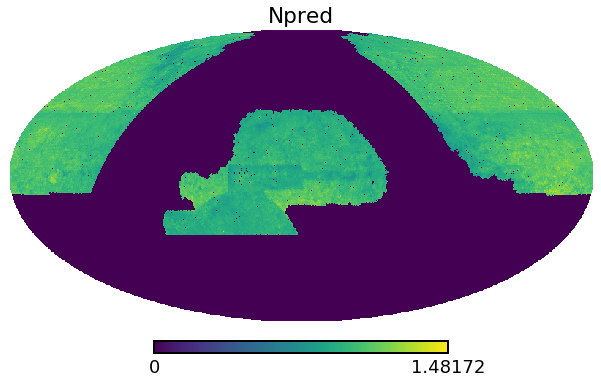

In [35]:
hp.mollview(wnns, title='Npred')

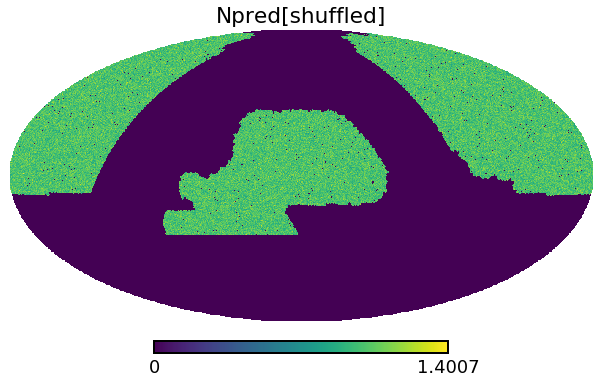

In [36]:
hp.mollview(wnn_sh, title='Npred[shuffled]')

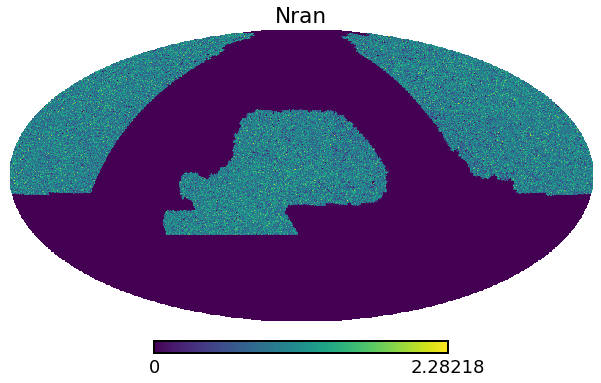

In [37]:
hp.mollview(nrans, title='Nran')

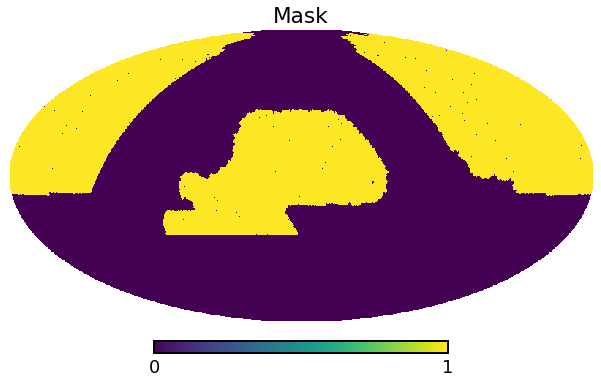

In [38]:
hp.mollview(mask, title='Mask')

In [39]:
af = AnaFast()

In [40]:
cl_mask = af(mask*1.0, weight, mask)
cl_wnn = af(wnns, weight, mask)
cl_nran = af(nrans, weight, mask)
cl_wnn_sh = af(wnn_sh, weight, mask)

Text(0.5, 0, '$\\ell$')

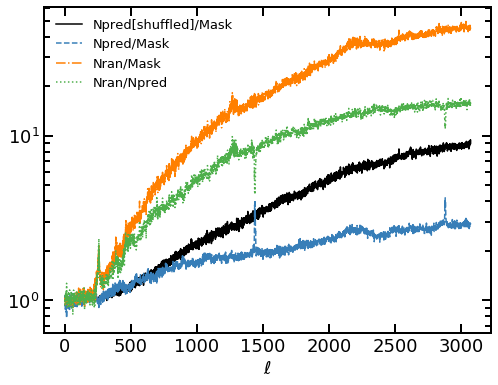

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(cl_wnn_sh['cl']/cl_mask['cl'], label='Npred[shuffled]/Mask')
plt.plot(cl_wnn['cl']/cl_mask['cl'],  label='Npred/Mask')
plt.plot(cl_nran['cl']/cl_mask['cl'],  label='Nran/Mask')
plt.plot(cl_nran['cl']/cl_wnn['cl'],  label='Nran/Npred')
# plt.xlim(xmin=1)
plt.yscale('log')
plt.legend()
# plt.grid(which='both')
plt.xlabel(r'$\ell$')

Text(0, 0.5, 'C$_{\\ell}$')

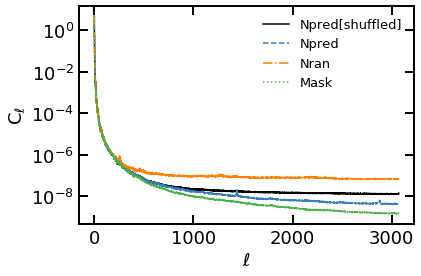

In [44]:
plt.plot(cl_wnn_sh['cl'], label='Npred[shuffled]')
plt.plot(cl_wnn['cl'],  label='Npred')
plt.plot(cl_nran['cl'], label='Nran')
plt.plot(cl_mask['cl'], label='Mask')
plt.yscale('log')

plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'C$_{\ell}$')

[100, 4000, 1e-09, 1e-05]

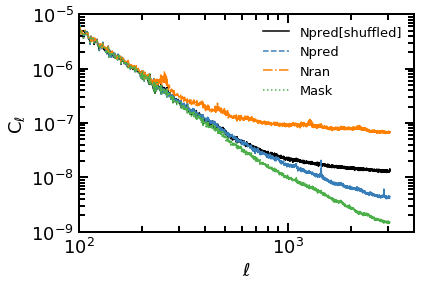

In [47]:

plt.plot(cl_wnn_sh['cl'], label='Npred[shuffled]')
plt.plot(cl_wnn['cl'],  label='Npred')
plt.plot(cl_nran['cl'], label='Nran')
plt.plot(cl_mask['cl'], label='Mask')
plt.yscale('log')

plt.legend()
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'C$_{\ell}$')
plt.axis([100, 4000, 1.0e-9, 1.0e-5])

In [70]:
wnns_smooth = hp.smoothing(wnns, fwhm=0.003)

Sigma is 4.379630 arcmin (0.001274 rad) 
-> fwhm is 10.313240 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


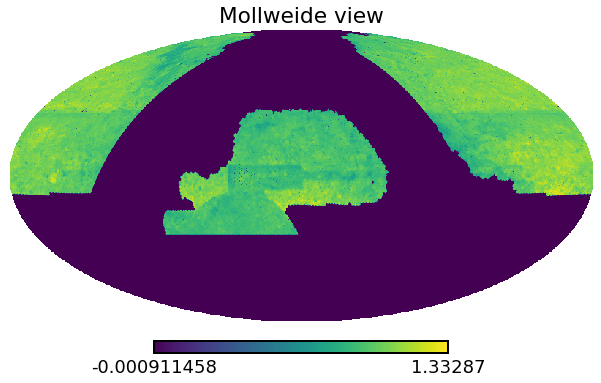

In [71]:
hp.mollview(wnns_smooth)

In [79]:
wnns_smooth /= wnns_smooth[mask].mean()

In [80]:
cl_wnnsmooth = af(wnns_smooth, weight, mask & (wnns_smooth > 0.0), )

[100, 4000, 1e-10, 1e-05]

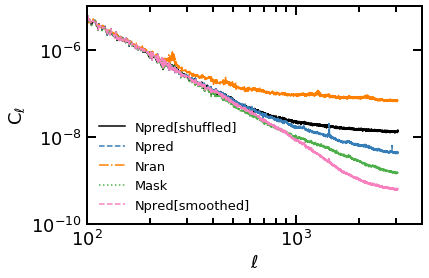

In [83]:
plt.plot(cl_wnn_sh['cl'], label='Npred[shuffled]')
plt.plot(cl_wnn['cl'],  label='Npred')
plt.plot(cl_nran['cl'], label='Nran')
plt.plot(cl_mask['cl'], label='Mask')
plt.plot(cl_wnnsmooth['cl'], label='Npred[smoothed]')

plt.yscale('log')

plt.legend()
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'C$_{\ell}$')
plt.axis([100, 4000, 1.0e-10, 1.0e-5])

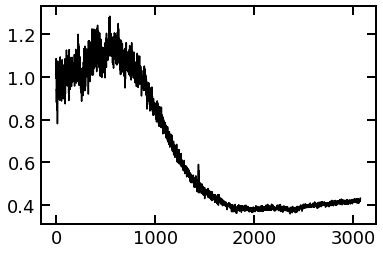

In [76]:
plt.plot(cl_wnnsmooth['cl']/cl_mask['cl'])
plt.ylabel('Smoothed Window / Mask')
plt.xlabel(r'$\ell$')

In [62]:
hp.nside2resol(1024, arcmin=True)

3.435486411817406